In [6]:
import matplotlib.pyplot as plt

import random
import math
import numpy as np

steps = 100
graph_interval = steps / 20
X0 = 50
S0 = 100

# initialize securities number and price for each step
X = [X0] * steps
S = [S0] * steps

# random jump from step to step, ranging from selling 2 units to buying to units
def random_trader():
    return np.random.randint(-2, 3)

def random_transact(x, trade_transactions):
    for i in range(1, trade_transactions):
        x[i] = x[i - 1] + random_trader()
        
random_transact(X, steps)

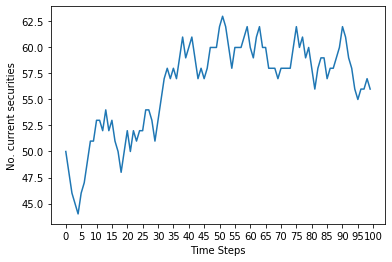

In [7]:
plt.plot(X)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('No. current securities')
plt.show()

In [8]:
## independent random variable in volativity
xi = np.insert(np.random.normal(0, 1.0, steps - 1), 0, 0.0)

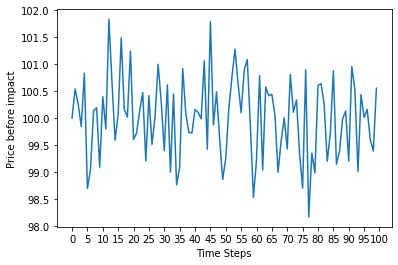

[100.0,
 100.54030383479252,
 100.2597317026177,
 99.8425759045851,
 100.83355582620221,
 98.69379171134278,
 99.0404364265644,
 100.13884910296417,
 100.19125557628021,
 99.08595113474519,
 100.39699967070126,
 99.80013364760072,
 101.83583673750123,
 100.65227007176784,
 99.58797275828573,
 100.07112676936306,
 101.49154746489623,
 100.16276641258519,
 100.0183052781731,
 101.24672328451749,
 99.60298625731957,
 99.72381948974603,
 100.13553693913775,
 100.47164953168898,
 99.2050224951608,
 100.41689464131028,
 99.51175637872365,
 100.02839096072469,
 100.99865547992017,
 100.31119566061136,
 99.39433593904855,
 100.61741323933143,
 98.99630959858195,
 100.44562660077055,
 98.76060716925171,
 99.07926925913368,
 100.9204259822646,
 100.07772249560398,
 99.73344164734581,
 99.72268905855071,
 100.15855488524953,
 100.1061430094292,
 99.98619374680146,
 101.0618545178302,
 99.4229557164851,
 101.79138794851237,
 99.87035388271293,
 100.48849702763485,
 99.62893441291288,
 98.860869306

In [11]:
## price dynamics
# volativity factors
def volativity_factor(volativity, xi):
    return volativity * xi

volativity = 0.3

S =[S[i] + volativity_factor(volativity, xi[i]) for i in range(steps)]

plt.plot(S)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('Price before impact')
plt.show()

S

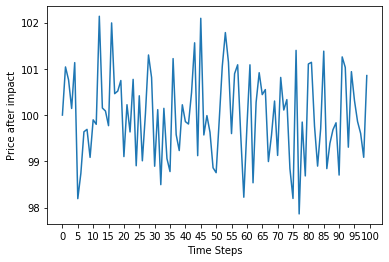

[100.0,
 101.04030383479252,
 100.7597317026177,
 100.1425759045851,
 101.13355582620221,
 98.19379171134278,
 98.7404364265644,
 99.63884910296417,
 99.69125557628021,
 99.08595113474519,
 99.89699967070126,
 99.80013364760072,
 102.13583673750122,
 100.15227007176784,
 100.08797275828573,
 99.77112676936306,
 101.99154746489623,
 100.46276641258518,
 100.5183052781731,
 100.74672328451749,
 99.10298625731957,
 100.22381948974603,
 99.63553693913775,
 100.77164953168898,
 98.90502249516081,
 100.41689464131028,
 99.01175637872365,
 100.02839096072469,
 101.29865547992017,
 100.81119566061136,
 98.89433593904855,
 100.11741323933143,
 98.49630959858195,
 100.14562660077056,
 99.06060716925171,
 98.77926925913368,
 101.2204259822646,
 99.57772249560398,
 99.23344164734581,
 100.22268905855071,
 99.85855488524953,
 99.8061430094292,
 100.48619374680146,
 101.5618545178302,
 99.12295571648511,
 102.09138794851236,
 99.57035388271294,
 99.98849702763485,
 99.62893441291288,
 98.86086930665

In [12]:
# impact
def permanent_impact(n, gamma):
    return gamma * n

def temporary_impact(n, epsilon, eta):
    return epsilon * np.sign(n) + eta * n

def expected_impact(n, gamma, espsilon, eta):
    return permanent_impact(n, gamma) + temporary_impact(n, epsilon, eta)

gamma = 0.1
epsilon = 0.1
eta = 0.1

n = np.insert(-np.diff(X), 0, 0)
S = [S[i] + expected_impact(n[i], gamma, epsilon, eta) for i in range(steps)]

plt.plot(S)
plt.xticks(np.arange(0, steps + 1, graph_interval))
plt.xlabel('Time Steps')
plt.ylabel('Price after impact')
plt.show()

S